# Steeel Plate Faults - Logitic Regression and Gradient Boosting

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import matplotlib.pyplot as plt

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


# Dataset Loading

In [ ]:
data = pd.read_csv('faults.csv')
features = data.values
labels = features[:,27:34]
features = features[:,0:27]

data.head()

# Standard Scaling

In [2]:
labels = [np.argmax(row) for row in labels]
x_train, x_test, y_train, y_test = train_test_split(features, labels,test_size=0.30,random_state=1)

scaler = StandardScaler()
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression

In [3]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.7169811320754716


C:\Users\Pranesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Feature Importance Visualization

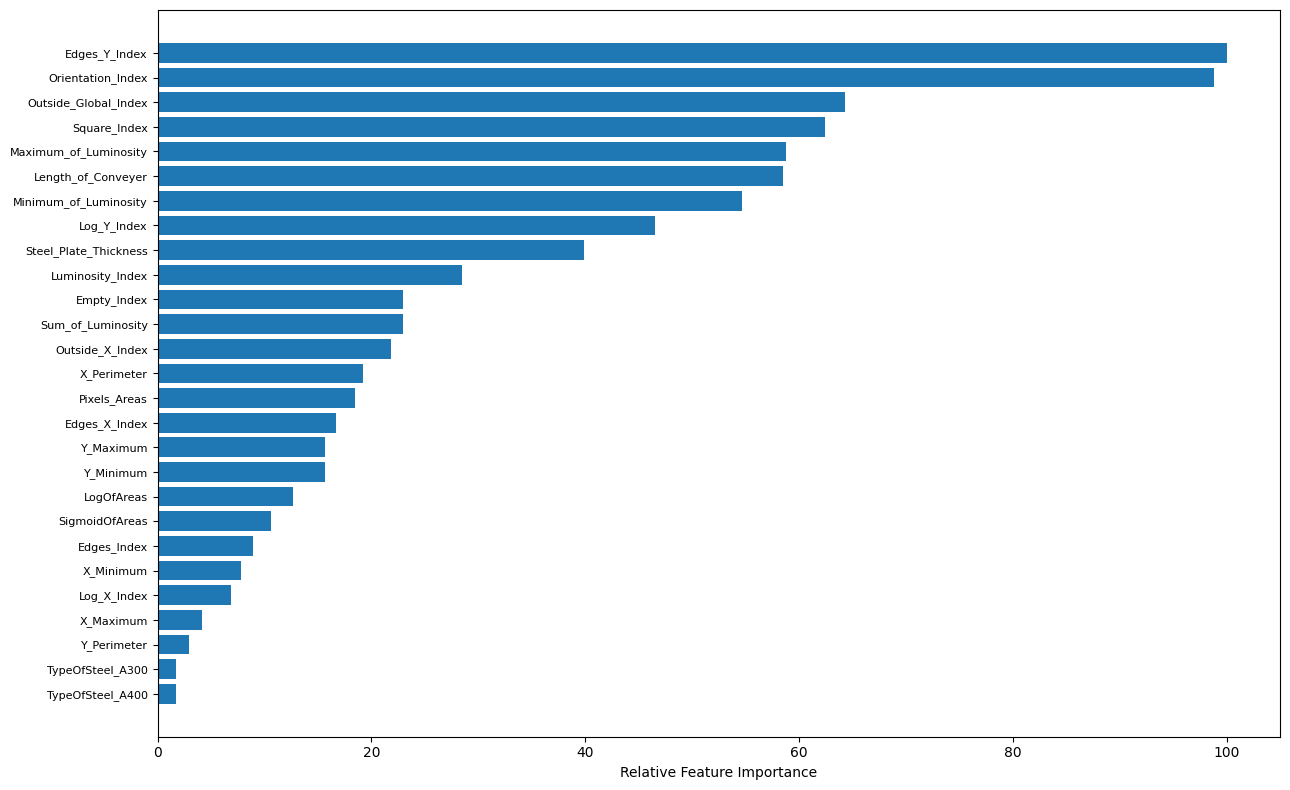

In [4]:
feature_importance = abs(classifier.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

cols = ['X_Minimum','X_Maximum','Y_Minimum','Y_Maximum','Pixels_Areas','X_Perimeter','Y_Perimeter','Sum_of_Luminosity','Minimum_of_Luminosity','Maximum_of_Luminosity','Length_of_Conveyer','TypeOfSteel_A300','TypeOfSteel_A400','Steel_Plate_Thickness','Edges_Index','Empty_Index','Square_Index','Outside_X_Index','Edges_X_Index','Edges_Y_Index','Outside_Global_Index','LogOfAreas','Log_X_Index','Log_Y_Index','Orientation_Index','Luminosity_Index','SigmoidOfAreas']

featfig = plt.figure(figsize=[13,8])
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(cols)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [5]:
data.drop('X_Minimum', axis = 1)
data.drop('Steel_Plate_Thickness', axis = 1)
data.drop('TypeOfSteel_A300', axis = 1)
data.drop('TypeOfSteel_A400', axis = 1)
data.drop('Pixels_Areas', axis = 1)
features2 = data.values
labels2 = features2[:,27:34]
features2 = features2[:,0:27]

In [6]:
labels2 = [np.argmax(row) for row in labels2]
x_train2, x_test2, y_train2, y_test2 = train_test_split(features2, labels2,test_size=0.30,random_state=1)

scaler = StandardScaler()
scaler.fit(x_train2)
# Apply transform to both the training set and the test set.
x_train2 = scaler.transform(x_train2)
x_test2 = scaler.transform(x_test2)

In [7]:
classifier = LogisticRegression()
classifier.fit(x_train2,y_train2)

y_pred2 = classifier.predict(x_test2)

print(accuracy_score(y_test2,y_pred2))

0.7169811320754716


C:\Users\Pranesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Gradient Boosting Classifier

In [8]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

ypred = gbc.predict(x_test)
print(accuracy_score(y_test,ypred))

0.7804459691252144
